# MA934 - class 4

- Deadline: 12:00 noon 29 October 2020
- All questions are worth equal marks

You should make at least one commit to your repository per computational task below - usually more.


In [1]:
# Import the module first!
push!(LOAD_PATH, pwd())
using Utilities

using Plots
using LaTeXStrings
using LinearAlgebra
using DualNumbers
using Random
Random.seed!(12345)
using Revise

pyplot()

Plots.PyPlotBackend()

## Task 1 - Solving a simple linear programme

Consider the following linear programme

$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$

subject to the constraints

$$2\, x_1 + x_2 \leq 70 $$
$$x_1 + 3\, x_2 \leq 90 $$
$$ 3\, x_1 + x_2 \geq 46 $$
$$ x_1 + 4\, x_2 \geq 52 $$

with $x_1 \geq 0$ and $x_2 \geq 0$.

Sketch the feasible set for this problem.

Determine the coordinates of the vertices of the feasible set in $\mathbb{R}^2$ and thereby determine the solution of the problem.

### 1.1 The Feasible Set

In [2]:
f1(x) = 70 - 2*x
f2(x) = 30 - 1/3 * x
f3(x) = 46 - 3 * x
f4(x) = 13 - 1/4 * x
fs = (f1, f2, f3, f4)
x_range = (0, 40)
inequalites = ("≥", "≥", "≤", "≤")
labels = (L"70 - 2x", L"30 - \frac{x}{3}", L"46 - 3x", L"13 - \frac{x}{4}")
colors = (:blue, :red, :green, :purple)

(:blue, :red, :green, :purple)

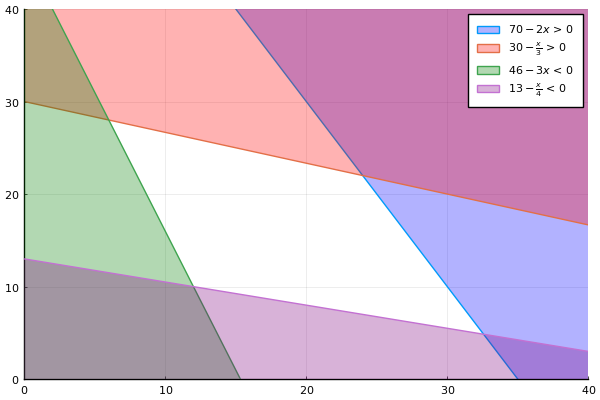

In [3]:
plotinequalities(fs, x_range, inequalites, labels, colors)

### 1.2 Vertices & Solutions

$$
\begin{cases}
x_1 + 3 x_2 & = 90 \\
2 x_1 + x_2 & = 70
\end{cases}
\implies 
\begin{cases}
x_1 & = 24 \\
x_2 & = 22
\end{cases}
$$

$$
\begin{cases}
2 x_1 +  x_2 & = 70  \\
 x_1 + 4 x_2 & = 52
\end{cases}
\implies 
\begin{cases}
x_1 & = \frac{228}{7} \\
x_2 & = \frac{34}{7}
\end{cases}
$$

$$
\begin{cases}
 x_1 + 4 x_2 & = 52 \\
 3 x_1 +  x_2 & = 46
\end{cases}
\implies 
\begin{cases}
x_1 & = 12 \\
x_2 & = 10
\end{cases}
$$

$$
\begin{cases}
3 x_1 +  x_2 & = 46 \\
 x_1 + 3 x_2 & = 90
\end{cases}
\implies 
\begin{cases}
x_1 & = 6 \\
x_2 & = 28
\end{cases}
$$

Thus, the vertices are $(24, 22)$, $(\frac{228}{7}, \frac{34}{7})$, $(12, 10)$, $(6, 28)$.

The solution is $(24, 22)$.

## Task 2 - Dantzig simplex algorithm

Write the above problem in standard form. Find a basic feasible vector in $\mathbb{R}^6$ with $x_1 = 12$ and $x_2 = 10$.

Write a code in Julia that implements the Dantzig simplex algorithm in its simplest form.

Start your code from the basic feasible vector that you found above and write down the sequence of basic feasible vectors leading to the solution you found previously.



The constraints are equivalent to 

$$
\begin{align*}
2 x_1 + x_2 & \le 70 \\ 
x_1 + 3 x_2 & \le 90 \\ 
-3x_1 - x_2 & \le -46 \\
-x_1 - 4 x_2 & \le -52
\end{align*}
$$

Now introduce slack variables $s_1, s_2, s_3, s_4$, such that 

$$
\begin{align*}
2 x_1 + x_2 + s_1 & = 70 \\ 
x_1 + 3 x_2 + s_2 & = 90 \\ 
-3x_1 - x_2 + s_3 & = -46 \\
-x_1 - 4 x_2 + s_4 & = -52
\end{align*}
$$

and $s_1 \ge 0$, $s_2 \ge 0$, $s_3 \ge 0$, $s_4 \ge 0$.

Let $A$ be the matrix

$$
\begin{bmatrix}
2 & 1 & 1 & 0 & 0 & 0 \\
1 & 3 & 0 & 1 & 0 & 0 \\
-3 & -1 & 0 & 0 & 1 & 0 \\
-1 & -4 & 0 & 0 & 0 & 1
\end{bmatrix},
$$

$\vec{x} = [x_1, x_2, s_1, s_2, s_3, s_4]^T$, $\vec{b} = [70, 90, -46, -52]^T$, and $\vec{c} = [-40, -60, 0, 0, 0, 0]^T$.

Then, the standard form of the linear programme is 

$$\min_{\vec{x} \in \Omega} f(\vec{x}) = \vec{c} \cdot \vec{x} = -40x_1 - 60 x_2,$$

where

$$\Omega = \{\vec{x} \in \mathbb{R}^6 | A \vec{x} = \vec{b}, \vec{x}_i \ge 0, \forall i \in \{1, 2, \cdots, 6\}\}.$$

Setting $x_1 = 12$ and $x_2 = 10$, by $A\vec{x} = \vec{b}$, we have $s_1 = 36$, $s_2 = 48$, $s_3 = 0$, and $s_4 = 0$. Thus, a basic feasible vector is 
$$
\vec{x} = 
\begin{bmatrix}
12 \\
10 \\ 
36 \\ 
48 \\ 
0 \\
0
\end{bmatrix}.
$$

In [4]:
c = [-40.0, -60.0, 0.0, 0.0, 0.0, 0.0]
A = [2.0  1.0  1.0 0.0 0.0 0.0;
     1.0  3.0  0.0 1.0 0.0 0.0;
     -3.0 -1.0 0.0 0.0 1.0 0.0;
     -1.0 -4.0 0.0 0.0 0.0 1.0]
x = [12.0, 10.0, 36.0, 48.0, 0.0, 0.0]
b = [70.0, 90.0, -46.0, -52.0]

basic_feasible_vectors = Dantzig(A, b, c, x)

3-element Array{Any,1}:
 [12.0, 10.0, 36.0, 48.0, 0.0, 0.0]
 [5.999999999999999, 28.000000000000004, 30.0, 0.0, 0.0, 66.0]
 [24.0, 22.000000000000004, 0.0, 0.0, 48.0, 60.0]

The last element of the array ```basic_feasible_vectors``` i.e. 

$$
\vec{x} = 
\begin{bmatrix}
24 \\ 
22 \\ 
0 \\ 
0 \\ 
48 \\
60 \\ 
\end{bmatrix}
$$

is optimal. 

By $f(\vec{x}) = \vec{c} \cdot \vec{x}$, we know the minimum value of $f$ is -2280.

In [5]:
minimum_f = dot(c, basic_feasible_vectors[end])

-2280.0

## Task 3 - Gradient descent

Consider the following optimisation problem in $\mathbb{R}^n$

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^n} } f(\mathbf{x})$$

where $f(\mathbf{x})$ is the quartic function defined as

$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

with 

$$ A = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$
$$
\mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)
$$
and $\lambda > 0$ is a parameter that controls the shape of the objective function. A reasonable range of values for $\lambda$ is $\frac{1}{10} \leq \lambda \leq 10$.

* Write down the solution of this problem.
* Write down the eigenvalues of the matrix $A$.
* Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$.
* Use your results to implement the gradient descent algorithm in Julia. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_*$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$. You can use the Golden Section Search code in https://github.com/colm-connaughton/MA934-gss (or write your own).
* Plot how the distance from the minimum decreases as s function of the number of iterations and empirically determine the convergence rate of the algorithm.
* Determine empirically how the number of steps required to solve the problem varies with $\lambda$ when $n=3$.

### 3.1 Eigenvalues of $A$

Let's compute the eigenvalues of $A$:

$$
\begin{vmatrix}
\frac{\lambda+1}{2}-\eta & \frac{\lambda-1}{2} & 0 & \cdots & 0 \\ 
\frac{\lambda-1}{2} & \frac{\lambda+1}{2}-\eta & 0 & \cdots & 0 \\
0 & 0 & 1-\eta & 0 \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots \vdots \\
0 & 0 & 0 & \cdots &1-\eta
\end{vmatrix} = 
\begin{vmatrix}
\frac{\lambda+1}{2}-\eta & \frac{\lambda-1}{2}\\ 
\frac{\lambda-1}{2} & \frac{\lambda+1}{2}-\eta
\end{vmatrix}
\cdot 
(1 - \eta)^{n-2}
$$

Since 

$$
\begin{vmatrix}
\frac{\lambda+1}{2}-\eta & \frac{\lambda-1}{2}\\ 
\frac{\lambda-1}{2} & \frac{\lambda+1}{2}-\eta
\end{vmatrix}
= \lambda - (\lambda+1)\eta + \eta^2,
$$

we know 

$$\det{A} = (\eta - \lambda)(\eta - 1) (1 - \eta)^{n-2}.$$

Hence, the eigenvalues of $A$ are $\lambda$ and $1$, both of which are positive. 

### 3.2 Solution of the Problem

Since $A$'s eigenvalues are positive, $A$ is positive definite, and thus, $f(\vec{x}) \ge 0$ and the equal sign is only taken when $\vec{x} = \vec{x}_*$. Thus, the solution to this optimization problem is 

$$
\vec{x} = \vec{x}_* = 
\begin{bmatrix}
\sqrt{2} \\ 
\sqrt{3} \\ 
1 \\
\vdots \\
1 \\
\end{bmatrix}.
$$

### 3.3 Derivation of $\nabla f$

Let 
$$g(\vec{x}) = (\vec{x} - \vec{x}_*)^T A (\vec{x} - \vec{x}_*),$$ 
so $f(\vec{x}) = \frac{1}{4} [g(\vec{x})]^2.$ 

By the chain rule, we have 
$$\nabla f(\vec{x}) = \frac{1}{2} g(\vec{x}) \nabla g(\vec{x}).$$

Expand $g$, we will have 

$$
\begin{align*}
g(\vec{x}) & = (\vec{x} - \vec{x}_*)^T A (\vec{x} - \vec{x}_*) \\
& =  (\vec{x} - \vec{x}_*)^T (A\vec{x} - A\vec{x}_*)\\
& =  \vec{x}^T A \vec{x}- \vec{x}_*^T A \vec{x} - \vec{x}^T A \vec{x}_* + \vec{x}_*^T A \vec{x}_* \\ 
& =  \vec{x}^T A \vec{x} - \vec{x}^T A^T \vec{x}_* - \vec{x}^T A \vec{x}_* + \vec{x}_*^T A \vec{x}_* \\
& =  \vec{x}^T A \vec{x} -  \vec{x}^T (A^T + A) \vec{x}_* + \vec{x}_*^T A \vec{x}_* \\ 
& =  \vec{x}^T A \vec{x} - 2 \vec{x}^T A \vec{x}_* + \vec{x}_*^T A \vec{x}_*.
\end{align*}
$$

So 
$$
\begin{align*}
\nabla g(\vec{x}) & = (A+A^T) \vec{x} - 2 A \vec{x}_* \\
& = 2 A \vec{x} - 2 A \vec{x}_* \\
& = 2 A (\vec{x} - \vec{x}_*),
\end{align*}
$$
and thus
$$
\begin{align*}
\nabla f(\vec{x}) & = \frac{1}{2} g(\vec{x}) \nabla g(\vec{x}) \\ 
& = (\vec{x} - \vec{x}_*)^T A (\vec{x} - \vec{x}_*) A (\vec{x} - \vec{x}_*).
\end{align*}
$$

### 3.4 Gradient Descent

In [6]:
A = [1.5 0.5; 0.5 1.5]
x_star = [sqrt(2), sqrt(3)]
f(x) = 1/4 * (transpose(x - x_star) * A * (x - x_star))^2 
∇f(x) = transpose(x - x_star) * A * (x - x_star) * A * (x - x_star)
x₀ = 5 .* x_star
(solution, counter, x_vals) = gradient_descent(f, ∇f, x₀, true)

([1.4142130394865482, 1.73205130469856], 5, Any[[1.0887644557551557, 2.0414663309279915], [1.4213839072394125, 1.7408326488846728], [1.4138010399082663, 1.732443006797944], [1.4142226510870592, 1.7320619389172642], [1.4142130394865482, 1.73205130469856]])

So the solution to this minimization problem is ```solution```.

In [7]:
@show solution

solution = [1.4142130394865482, 1.73205130469856]


2-element Array{Float64,1}:
 1.4142130394865482
 1.73205130469856

### 3.5 The Plot and the Convergence Rate

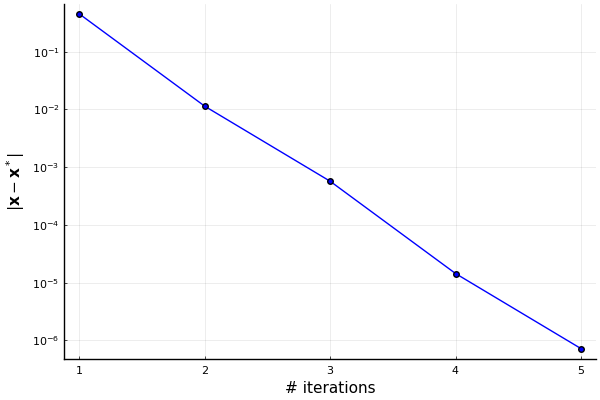

In [8]:
n_vals = 1: length(x_vals)

dist(vec) = sqrt((vec[1]-sqrt(2))^2 + (vec[2]-sqrt(3))^2)
dists = dist.(x_vals)

plot(n_vals, dists, yscale=:log10, color=:blue, label="", xlabel="# iterations", 
    ylabel=L"\left|\mathbf{x}-\mathbf{x}^* \right|")
scatter!(n_vals, dists, label="", color=:blue)

From the plot above, it is reasonable to think that the convergence rate is exponential.

### 3.6 Steps Needed When $n = 3$

Now, set $n = 3$, and make $\lambda$ range from $1/10$ to $10$ with the step $1/10$.

In [9]:
λs = 1/10 : 1/10 : 10
steps = zeros(length(λs))
for i in 1: length(λs)
    λ = λs[i]
    A = [(λ+1)/2 (λ-1)/2 0; (λ-1)/2 (λ+1)/2 0; 0 0 1]
    x_star = [sqrt(2), sqrt(3), 1]
    f(x) = 1/4 * (transpose(x - x_star) * A * (x - x_star))^2 
    ∇f(x) = transpose(x - x_star) * A * (x - x_star) * A * (x - x_star)
    x₀ = 5 .* x_star
    (solution, counter, x_vals) = gradient_descent(f, ∇f, x₀)
    steps[i] = counter
end

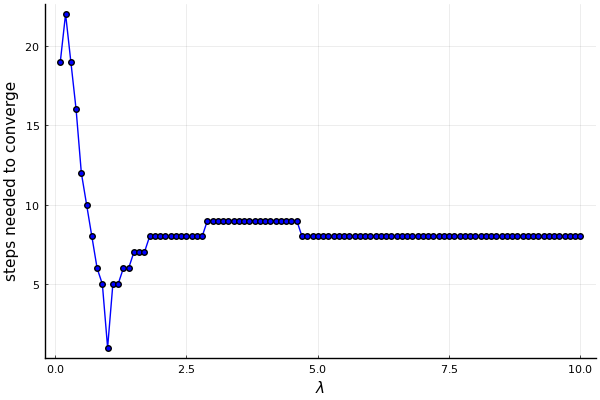

In [10]:
plot(λs, steps, color=:blue, label="", xlabel=L"\lambda", 
    ylabel="steps needed to converge")
scatter!(λs, steps, label="", color=:blue)

It seems like the behavior of the number of steps needed is a bit erratic, but a fair guess on it would be within 10 steps, i.e. for a general $\lambda \in [\frac{1}{10}, 10]$, the steps needed for the algorithm to converge is usually less than $10$.

## Task 4 - Gradient descent using automatic differentiation

Julia supports dual numbers via the DualNumbers.jl package. Modify your code from the previous task to do all computations using dual arithmetic and create an implementation of the gradient descent algorithm that uses automatic differentiation to calculate gradients. Check that you get the same answer.

Note that calculating partial derivatives using automatic differentiation requires multiple function evaluations. Here's one way to do it for a function, $f(x)$ of $n$ variables:

```
D = Matrix{Dual}(Dual(0.0,1.0)I, n, n)
F = [ f(x + D[:,k]) for k in 1:n]
value = realpart(F[1])
grad = epsilon.(F)
```

This assumes that the function $f : \mathbb{R}^n \to \mathbb{R}$ has already been defined, that $x$ is an n-vector
of dual numbers with zero dual part. 

In [11]:
A = [1.5 0.5; 0.5 1.5]
x_star = [sqrt(2), sqrt(3)]
f(x) = 1/4 * (transpose(x - x_star) * A * (x - x_star))^2 
x₀ = 5 .* x_star

gradient_descent_auto_diff(f, x₀)

2-element Array{Float64,1}:
 1.4142130394763197
 1.732051304699591

Compared with the result we got in Task 3, which is 

```
2-element Array{Float64,1}:
 1.4142130394865482
 1.73205130469856
 ```
 
 the result from auto differentiation is almost the same!

## Task 5 - Stochastic gradient descent

Consider the following linear model expressing a noisy relationship between a target variable, $y \in \mathbb{R}$ and a set of predictor variables, $\mathbf{x} \in \mathbb{R}^n$:

$$ y = \mathbf{\alpha}^T \, \mathbf{x} + \xi $$

where $\mathbf{\alpha} \in \mathbb{R}^n$ is a set of parameters and $\xi \sim N(0, \sigma^2)$ is a normal random variable with mean 0 and variance $\sigma^2$ representing the error. We are given a set of $m$ observations

$$Y = \left\{(\mathbf{x}^{(i)},\, y^{(i)})\ : i=1\ldots m \right\}$$

Our task is to find the "best" set of parameters, $\mathbf{\alpha}_*$ given the observations by solving the ordinary least squares problem:

$$\mathbf{\alpha}_* = \min_{\substack{\mathbf{\alpha} \in \mathbb{R}^n} } F(\mathbf{\alpha}\, |\, Y)$$

where

$$ F(\mathbf{\alpha}\, |\, Y) = \frac{1}{2}\, \frac{1}{m} \sum_{i=1}^m\left( y^{(i)} - \mathbf{\alpha}^T\,\mathbf{x}^{(i)}\right)^2$$

Create a test problem as follows (obviously you can vary the parameters):

```
rng = RandomDevice()
n=10
m=100
xmax = 10.0
σ = 0.25
αstar = reshape(rand(rng, n), n, 1)
x = reshape(xmax*rand(rng, n, m), n, m)
ξ = reshape(σ*randn(rng, m), 1, m)
y = αstar' * x + ξ
```

* Solve the problem using the gradient descent code you have written above. Due to the noise, you should not expect to recover the exact "true" value of $\alpha_*$ used to generate the test data but you should be close if the noise is not too large.
* Modify your code to do the optimisation using stochastic gradient descent and compare the results graphically.
* Fix $n=10$ and $m=250$. Compare the performance of your stochastic gradient descent algorithm with different learning rates. Can you find one that performs well?

### 5.1 Gradient Descent

In [12]:
rng = RandomDevice()
n=10 # number of features
m=100 # number of training examples
xmax = 10.0
σ = 0.25
αstar = reshape(rand(rng, n), n) # coefficients: n x 1
X = reshape(xmax*rand(rng, m, n), m, n) # design matrix: m x n
ξ = reshape(σ*randn(rng, m), m) # noise: m x 1
y = X * αstar + ξ # shape of y: n x 1

100-element Array{Float64,1}:
 39.62750819061192
 36.3001291349997
 23.216596022569803
 26.976028381422744
 35.92891261839384
 35.30359667288321
 19.867108106733234
 22.344744599460128
 24.299833699759755
 37.87395083359152
 24.66186629263294
 29.18684794820097
 22.651789494622577
  ⋮
 23.053550673499778
 27.53639983458854
 24.01535752960726
 26.00913144551242
 26.792238980089127
 28.999687022298787
 34.125571461380375
 29.920900011472472
 31.200450377827387
 23.303461029739108
 25.014688207519935
 32.98942336486331

In [13]:
f(α) = 1/2 * 1/m * transpose(y - X*α) * (y - X*α)
∇f(α) = 2 * transpose(X) * (X*α - y)
α₀ = zeros(n)

# Ordiniary version
(α_estimate1, counter, x_vals) = gradient_descent(f, ∇f, α₀, false, 10^(-6), 10^4, false)

([0.7005900781543783, 0.6293535058216756, 0.9628567705115577, 0.831302863983323, 0.5047147720269997, 0.9648402584594642, 0.7165759245609804, 0.5600186332459596, 0.06258162174430254, 0.1723153074268529], 10001, Any[])

In [14]:
@show norm(α_estimate1-αstar)

norm(α_estimate1 - αstar) = 0.031413771045178444


0.031413771045178444

In [15]:
α_estimate2 = gradient_descent_auto_diff(f, α₀, 10^(-6), 10^4, false)

10-element Array{Float64,1}:
 0.7005900781543786
 0.6293535058216763
 0.962856770511558
 0.8313028639833235
 0.5047147720270001
 0.9648402584594649
 0.716575924560981
 0.5600186332459599
 0.06258162174430335
 0.17231530742685358

In [16]:
@show norm(α_estimate2-αstar)

norm(α_estimate2 - αstar) = 0.03141377104517862


0.03141377104517862

### 5.2 Stochastic Gradient Descent

In [17]:
∇L(α, Xₙ, Yₙ) = - 1/m * (Yₙ - dot(Xₙ, α)) * (Xₙ)

α = stochastic_gradient_descent(∇L, α₀, X, y, 1, 1, 10^(-6), 50000)
@show norm(α - αstar)

norm(α - αstar) = 0.12682328421763223


0.12682328421763223

In [18]:
iter_nums = 1: 10: (10^4+1)
error_GD = zeros(length(iter_nums))
error_SGD = zeros(length(iter_nums))
for i in 1:length(iter_nums)
    iter_num = iter_nums[i]
    error_GD[i] = norm(αstar - 
        gradient_descent_auto_diff(f, α₀, 10^(-6), iter_num, false), 2)
    error_SGD[i] = norm(αstar - 
        stochastic_gradient_descent(∇L, α₀, X, y, 1, 1, 10^(-6), iter_num), 2)
end

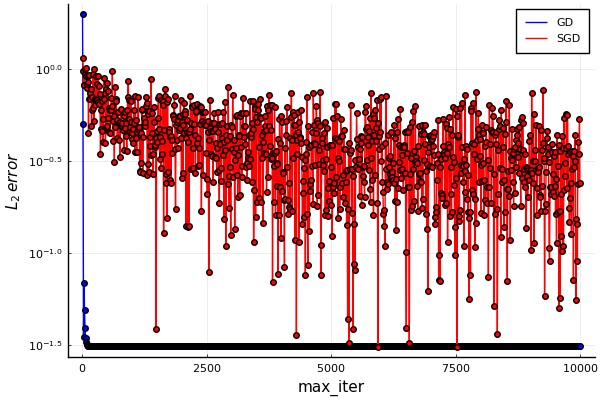

In [19]:
plot(iter_nums, error_GD, color=:blue, yscale=:log10, label="GD", xlabel="max_iter", 
    ylabel=L"L_2 \, error")
scatter!(iter_nums, error_GD, label="", color=:blue)
plot!(iter_nums, error_SGD, label="SGD", color=:red)
scatter!(iter_nums, error_SGD, label="", color=:red)

### 5.3 Different Learning Rates

In [20]:
n=10 # number of features
m=250 # number of training examples
xmax = 10.0
σ = 0.25
αstar = reshape(rand(rng, n), n) # coefficients: n x 1
X = reshape(xmax*rand(rng, m, n), m, n) # design matrix: m x n
ξ = reshape(σ*randn(rng, m), m) # noise: m x 1
y = X * αstar + ξ # shape of y: n x 1

∇L(α, Xₙ, Yₙ) = - 1/m * (Yₙ - dot(Xₙ, α)) * (Xₙ)

xi_pairs = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
iter_nums = 1: 10: (10^4+1)
errors = Dict()
for i in 1: length(xi_pairs)
    (ξ₀, ξ₁) = xi_pairs[i]
    errors_i = zeros(length(iter_nums))
    for j in 1: length(iter_nums)
        iter_num = iter_nums[j]
        α = stochastic_gradient_descent(∇L, α₀, X, y, ξ₀, ξ₁, 10^(-6), iter_num)
        errors_i[j] = norm(α-αstar, 2)
    end
    errors[(ξ₀, ξ₁)] = errors_i
end

Let's fix $\xi_0$ and compare the convergent behaviors of algorithms with different $\xi_1$ first.

#### $\xi_0 = 1$ and $\xi_1 = 1,\,2,\,3$ 

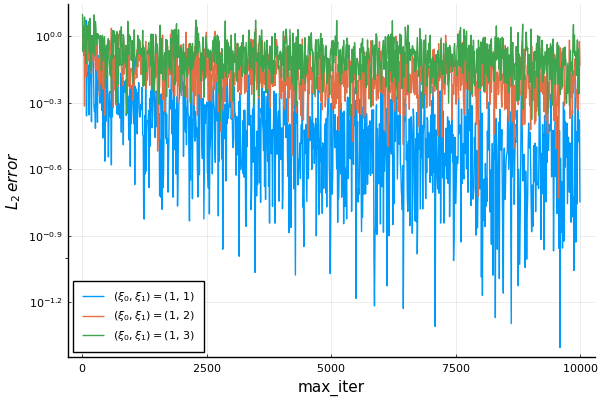

In [21]:
key = (1, 1)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (1, 2)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (1, 3)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

From the plot above, the best value of $\xi_1$ seems to be $1$.

#### $\xi_0 = 2$ and $\xi_1 = 1,\,2,\,3$ 

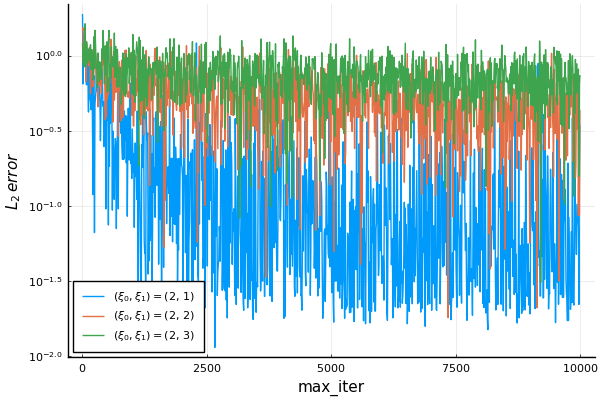

In [22]:
key = (2, 1)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (2, 2)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (2, 3)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

From the plot above, the best value of $\xi_1$ seems to be 1.

#### $\xi_0 = 3$ and $\xi_1 = 1,\,2,\,3$ 

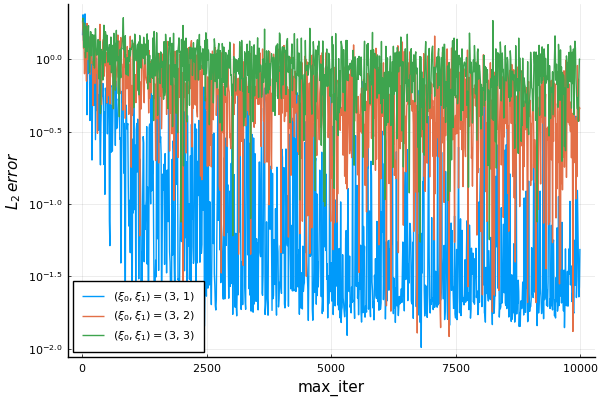

In [23]:
key = (3, 1)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (3, 2)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (3, 3)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

From the plot above, the best value of $\xi_1$ seems to be 1.

#### Conclusion 1

When $\xi_0$ is fixed within $\{1, 2, 3\}$, with regard to convergence, the best value of $\xi_1$ is $1$.

Now, let's fix $\xi_1$ and compares algorithms with different $\xi_0$.

#### $\xi_1 = 1$ and $\xi_0 = 1, \, 2, \, 3$

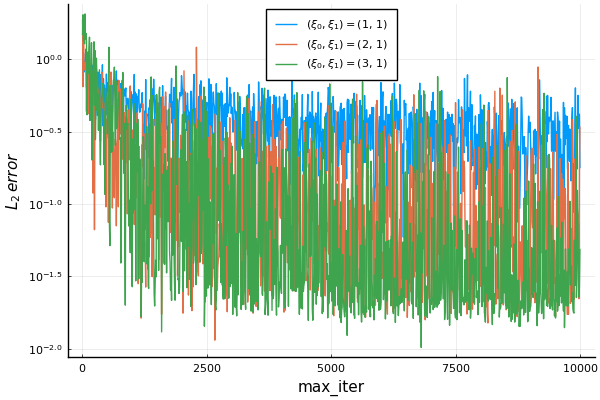

In [24]:
key = (1, 1)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (2, 1)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (3, 1)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

It looks like when $\xi_1 = 1$, $\xi_0 = 3$ converges fastest.

#### $\xi_1 = 2$ and $\xi_0 = 1, \, 2, \, 3$

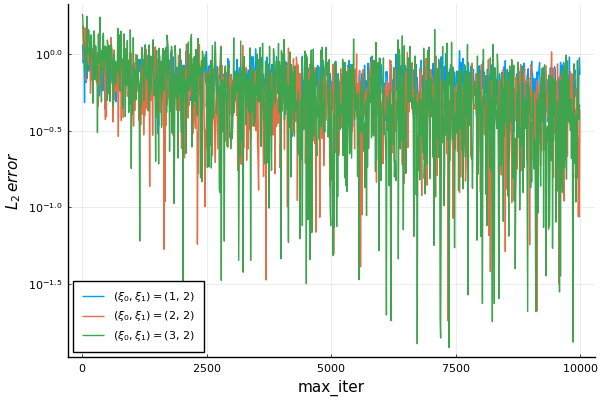

In [25]:
key = (1, 2)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (2, 2)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (3, 2)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

It looks like when $\xi_1 = 2$, $\xi_0 = 3$ converges fastest.

#### $\xi_1 = 3$ and $\xi_0 = 1, \, 2, \, 3$

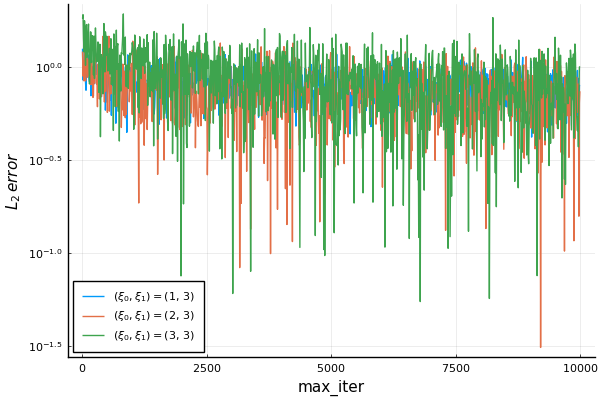

In [26]:
key = (1, 3)
val = errors[key]
plot(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)), 
            yscale=:log10, xlabel="max_iter", ylabel=L"L_2 \, error")
key = (2, 3)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))
key = (3, 3)
val = errors[key]
plot!(iter_nums, val, label=(L"(\xi_0, \xi_1) ="*string(key)))

It looks like when $\xi_1 = 3$, $\xi_0 = 3$ converges fastest.

#### Conclusion 2

When $\xi_1$ is fixed, the best value of $\xi_0$ is $3$.

#### Conclusion

Combining **Conclusion 1** and **Conclusion 2**, among all pairs of $\xi_0$ and $\xi_1$ which are elements from

$$
\begin{bmatrix}
(1, 1) & (1, 2) & (1, 3)\\
(2, 1) & (2, 2) & (2, 3)\\
(3, 1) & (3, 2) & (3, 3)
\end{bmatrix}
$$

the one demonstrates the best convergent pattern is $(3, 1)$.